#  Data Analysis and Report Notebook
November 6, 2025
Sarah Innis

## Load Packages

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

## Load in the Data

Bring in and preview Seattle Building Permits data.

In [2]:
permits = pd.read_csv('data/Building_Permits_20251106.csv')
permits.head()

C:\Users\sarah\AppData\Local\Temp\ipykernel_19872\4127347995.py:1: DtypeWarning: Columns (25,26,27,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  permits = pd.read_csv('data/Building_Permits_20251106.csv')


,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,...,InitialReviewCompleteDate,PlanReviewCompleteDate,DaysIssuePermitCity,ReadyToIssueDate,Zoning,DwellingUnitType,StandardPlan,DependentBuilding,ParentPermitNum,HousingCategory
0,3001776-EX,Commercial,Non-Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Land Use Appl...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,3002256-EX,Single Family/Duplex,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: CANCELLED 3/8...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,3002287-EX,Single Family/Duplex,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Land Use Appl...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,3003446-EX,Industrial,Non-Residential,ECA and Shoreline Exemption/Street Improvement...,Shoreline Exemption,Exception/Exemption Request for: CANCELLED 3/2...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,3003449-EX,Multifamily,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: CANCELED PER ...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


These are the columns where pandas is warning of mixed data types.

In [3]:
cols = permits.columns
cols[[25,26,27,30,32]]


Index(['TotalDaysPlanReview', 'DaysInitialPlanReview', 'DaysPlanReviewCity',
       'InitialReviewCompleteDate', 'DaysIssuePermitCity'],
      dtype='object')

Check the first column and see what values are not able to be converted to numeric. We can see it is because numbers in the thousands are formatted with commas. 

In [5]:
converted = pd.to_numeric(permits['TotalDaysPlanReview'], errors='coerce')
invalid_mask = converted.isna() & permits['TotalDaysPlanReview'].notna()
permits.loc[invalid_mask, 'TotalDaysPlanReview'].unique()[1:5]

array(['4,191', '4,734', '1,427', '1,080'], dtype=object)

Fix all the columns that are a number of days so the datatype is numeric.

In [5]:
cols_to_clean = ['TotalDaysPlanReview', 'DaysInitialPlanReview', 'DaysPlanReviewCity', 'DaysIssuePermitCity']

permits[cols_to_clean] = permits[cols_to_clean].apply(
    lambda s: pd.to_numeric(s.astype(str).str.replace(',', ''), errors='coerce')
)


Look at the last column - 'InitialReviewCompleteDate' with mixed data types

In [6]:
permits['InitialReviewCompleteDate'].isna().sum()

np.int64(155780)

InitialReviewCompleteDate should be a timestamp

In [7]:
permits[~permits['InitialReviewCompleteDate'].isna()].head(5)

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,...,InitialReviewCompleteDate,PlanReviewCompleteDate,DaysIssuePermitCity,ReadyToIssueDate,Zoning,DwellingUnitType,StandardPlan,DependentBuilding,ParentPermitNum,HousingCategory
10828,6103546-CN,Single Family/Duplex,Residential,Building,New,Construct single family residence (unit #9) pe...,1,0.0,1.0,"237,625",...,2018 May 07 12:00:00 AM,2018 May 07 12:00:00 AM,NaN,2018 May 07 12:00:00 AM,L-4,Detached Single-Family,0.0,0,6076603-CN,Housing - Other
44151,6319280-PH,Commercial,Non-Residential,Building,New,Phased project: Construction of an apartment ...,271,0.0,271.0,"72,760,513",...,2018 May 24 12:00:00 AM,2019 Mar 01 12:00:00 AM,NaN,2019 Mar 05 12:00:00 AM,HR,Apartment,0.0,0,NaN,NaN
54284,6332444-PH,Commercial,Non-Residential,Building,New,Phased project: Construct a new hotel confere...,0,0.0,0.0,"27,524,455",...,2018 Jun 13 12:00:00 AM,2018 Jun 13 12:00:00 AM,NaN,2018 Jun 21 12:00:00 AM,NaN,NaN,NaN,0,NaN,NaN
56444,6361129-CN,Single Family/Duplex,Residential,Building,New,Establish use as and construct a single-family...,1,0.0,1.0,"317,244",...,2019 Apr 26 12:00:00 AM,2021 Sep 27 12:00:00 AM,190.0,2021 Sep 27 12:00:00 AM,NR3,Detached Single-Family,0.0,0,NaN,Middle Housing
59889,6362107-PH,Commercial,Non-Residential,Building,New,Phased project: Construction of a residential...,343,0.0,343.0,"73,587,462",...,2018 May 06 12:00:00 AM,2019 Mar 26 12:00:00 AM,NaN,2019 Mar 27 12:00:00 AM,DMC,Apartment,0.0,0,NaN,NaN


In [ ]:
permits['InitialReviewCompleteDate'] = pd.to_datetime(permits['InitialReviewCompleteDate'], format='%Y %b %d %I:%M:%S %p', errors = 'coerce')

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: InitialReviewCompleteDate, dtype: datetime64[ns]

In [9]:
permits[~permits['InitialReviewCompleteDate'].isna()].head(5)

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,...,InitialReviewCompleteDate,PlanReviewCompleteDate,DaysIssuePermitCity,ReadyToIssueDate,Zoning,DwellingUnitType,StandardPlan,DependentBuilding,ParentPermitNum,HousingCategory
10828,6103546-CN,Single Family/Duplex,Residential,Building,New,Construct single family residence (unit #9) pe...,1,0.0,1.0,"237,625",...,2018-05-07,2018 May 07 12:00:00 AM,NaN,2018 May 07 12:00:00 AM,L-4,Detached Single-Family,0.0,0,6076603-CN,Housing - Other
44151,6319280-PH,Commercial,Non-Residential,Building,New,Phased project: Construction of an apartment ...,271,0.0,271.0,"72,760,513",...,2018-05-24,2019 Mar 01 12:00:00 AM,NaN,2019 Mar 05 12:00:00 AM,HR,Apartment,0.0,0,NaN,NaN
54284,6332444-PH,Commercial,Non-Residential,Building,New,Phased project: Construct a new hotel confere...,0,0.0,0.0,"27,524,455",...,2018-06-13,2018 Jun 13 12:00:00 AM,NaN,2018 Jun 21 12:00:00 AM,NaN,NaN,NaN,0,NaN,NaN
56444,6361129-CN,Single Family/Duplex,Residential,Building,New,Establish use as and construct a single-family...,1,0.0,1.0,"317,244",...,2019-04-26,2021 Sep 27 12:00:00 AM,190.0,2021 Sep 27 12:00:00 AM,NR3,Detached Single-Family,0.0,0,NaN,Middle Housing
59889,6362107-PH,Commercial,Non-Residential,Building,New,Phased project: Construction of a residential...,343,0.0,343.0,"73,587,462",...,2018-05-06,2019 Mar 26 12:00:00 AM,NaN,2019 Mar 27 12:00:00 AM,DMC,Apartment,0.0,0,NaN,NaN


Bring in and preview the Seattle City Council Districts data.

In [9]:
council = gpd.read_file('data/council_districts/council_districts_10_20_PL.shp')

In [10]:
print(council.head())
print(council.columns)
print(council.crs)

   COUNCIL_DI  F2010_PL_d  F2010_PL_1  F2010_PL_2  F2010_PL_3  F2010_PL_4  \
0           1       91111       86176       65612        6741        1091   
1           2       92186       86819       29009       19759         747   
2           3       85032       80719       61595        9171         543   
3           7       71223       68088       56104        3657         664   
4           6       89496       85624       77846        1326         491   

   F2010_PL_5  F2010_PL_6  F2010_PL_7  F2010_PL_8  ...  F2000_P_10  \
0        8700         609        3423        4935  ...         267   
1       32908         675        3721        5367  ...         264   
2        7423         210        1777        4313  ...         258   
3        6419         186        1058        3135  ...         140   
4        4747         141        1073        3872  ...         241   

   F2000_P_11  F2000_PL_M  F2000_P_12  F2000_P_13  F2000_PL_U  F2000_P_14  \
0        3561       26628       69467  

<Axes: >

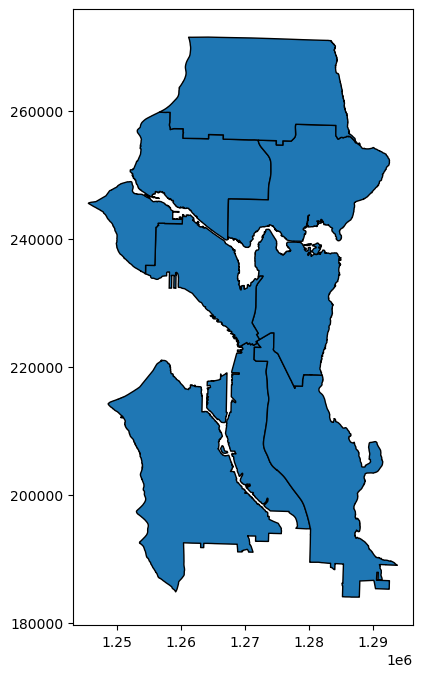

In [11]:
council.plot(edgecolor = 'black', figsize = (8,8))

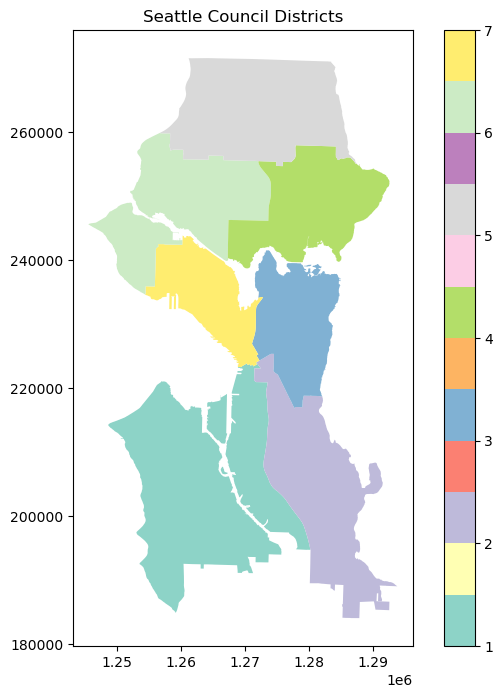

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
council.plot(ax=ax, column='COUNCIL_DI', cmap='Set3', legend=True)
plt.title("Seattle Council Districts")
plt.show()


In [17]:
import contextily as ctx
print(council.crs)
council = council.to_crs(epsg=3857)

PROJCS["NAD83(HARN) / Washington North (ftUS)",GEOGCS["NAD83(HARN)",DATUM["NAD83_High_Accuracy_Reference_Network",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6152"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",47],PARAMETER["central_meridian",-120.833333333333],PARAMETER["standard_parallel_1",47.5],PARAMETER["standard_parallel_2",48.7333333333333],PARAMETER["false_easting",1640416.66666667],PARAMETER["false_northing",0],UNIT["US survey foot",0.304800609601219,AUTHORITY["EPSG","9003"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


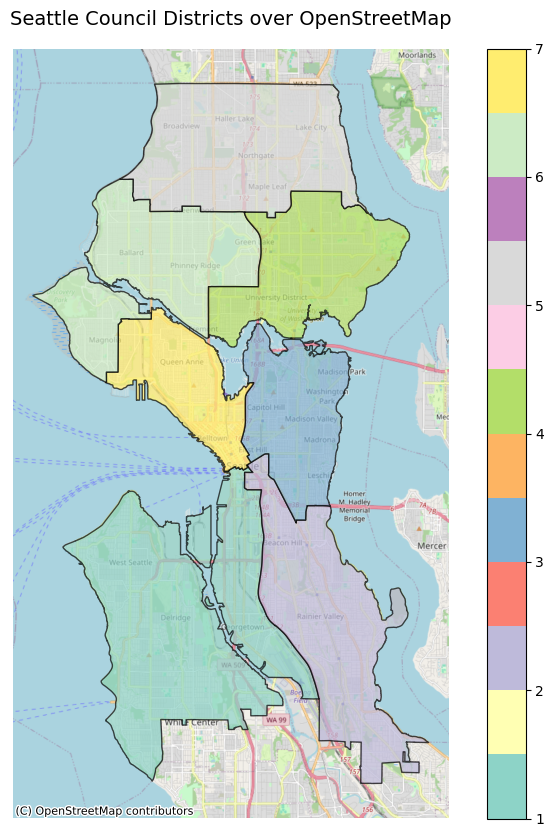

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your shapefile
council.plot(ax=ax, column='COUNCIL_DI', cmap='Set3', edgecolor='black', alpha=0.7, legend=True)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Remove axes for a cleaner look
ax.set_axis_off()
plt.title("Seattle Council Districts over OpenStreetMap", fontsize=14)
plt.show()


## Learning about the Permits

In [ ]:
permits.groupby('PermitClass')

In [19]:
permits.columns

Index(['PermitNum', 'PermitClass', 'PermitClassMapped', 'PermitTypeMapped',
       'PermitTypeDesc', 'Description', 'HousingUnits', 'HousingUnitsRemoved',
       'HousingUnitsAdded', 'EstProjectCost', 'AppliedDate', 'IssuedDate',
       'ExpiresDate', 'CompletedDate', 'StatusCurrent', 'RelatedMup',
       'OriginalAddress1', 'OriginalCity', 'OriginalState', 'OriginalZip',
       'ContractorCompanyName', 'Link', 'Latitude', 'Longitude', 'Location1',
       'TotalDaysPlanReview', 'DaysInitialPlanReview', 'DaysPlanReviewCity',
       'DaysOutCorrections', 'NumberReviewCycles', 'InitialReviewCompleteDate',
       'PlanReviewCompleteDate', 'DaysIssuePermitCity', 'ReadyToIssueDate',
       'Zoning', 'DwellingUnitType', 'StandardPlan', 'DependentBuilding',
       'ParentPermitNum', 'HousingCategory'],
      dtype='object')

Fields
- PermitNum (Text): unique permit number 
- PermitClass (Text): The type of project. Single Family/Duplex, Commercial, Multifamily, Institutional, Industrial, Vacant Land
- PermitClassMapped (Text): Residential or Non-Residential
- PermitTypeMapped (Text): Permit Category. Options: Building, ECA and Shoreline Exemption/Street Improvement Exception Request, Demolition, Roof, Grading
- PermitTypeDesc (Text): Additional information about the type of permit. For example, whether it is an addition/alternation or a new project. Around 15 different values.
- Description (Text): Description of work done under this permit
- HousingUnits (Number) : The number of housing units included at the beginning of the project
- HousingUnitsRemoved (Number) : The number of housing units removed during the project
- HousingUnitsAdded (Number) : The number of housing units added during the project
- EstProjectCost (Number) : Estimated project cost defined as parts plus labor
- AppliedDate (Floating Timestamp) : The date SDCI accepted the application as a complete submittal
- IssuedDate (Floating Timestamp) : The date SDCI issued the permit. If not present, it generally means the application is still under review.
- ExpiresDate (Floating Timestamp) : The date the application is due to expire. The date by which work is supposed to be completed.
- CompletedDate (Floating Timestamp) : The date the permit had all its inspections completed. If not present, it generally means the permit is still under inspection
- StatusCurrent (Text) : The most recent process step that was fully completed. Around 20 different values
- RelatedMup (Text) : The land use permit related to the building permit, if there is one
- OriginalAddress1 (Text) : Street name and number of the project
- OriginalCity (Text) : City of the project
- OriginalState (Text) : State of the project
- OriginalZip (Text) : Zip code of the project
- ContractorCompanyName (Text) : The contractor(s) associated with the permit
- Link (URL) : Link to permit information on SDCI website
- Latitude (Number) : Latitude of the worksite
- Longitude (Number) : Longitude of the worksite
- Location1 (Location) : The latitude and longitude location for mapping purposes
- TotalDaysPlanReview (Number) : Number of days between AppliedDate and the date SDCI completed all plan reviews
- DaysInitialPlanReview (Number) : Number of days between AppliedDate and when the initial plan review was completed
- DaysPlanReviewCity (Number) : Number of days between AppliedDate and when all plan reviews were completed
- DaysOutCorrections (Number) : Number of days applicant took to correct permit application when all plan reviews were completed
- NumberReviewCycles (Number) : Number of review cycles for this permit
- InitialReivewCompleteDate (Floating Timestamp) : date SDCI completed initial plan review
- PlanReviewCompleteDate (Floating Timestamp) : date SDCI completed all plan reviews
- DaysIssuePermitCity (Number) : number of days city had permit between AppliedDate and issue date
- ReadyToIssueDate (Floating Timestamp) : The date SDCI is ready to issue the permit, pending payment of final permit fees
- Zoning (Text) : The zoning code for the project location 
- DwellingUnitType (Text) : Type of housing being built
- StandardPlan (Text) : whether this permit uses a pre-approved DADU plan
- DependentBuilding (Text) : whether this permit is dependent on another permit application
- ParentPermitNum (Text) : The permit number of the overarching permit related to this building permit
- HousingCategory (Text) : Type of created housing


In [21]:
permits['PermitClass'].value_counts()

PermitClass
Single Family/Duplex    107193
Commercial               41925
Multifamily              21108
Institutional             5487
Industrial                2463
Vacant Land                434
Name: count, dtype: int64

In [22]:
permits['PermitClassMapped'].value_counts()

PermitClassMapped
Residential        128301
Non-Residential     50309
Name: count, dtype: int64

In [25]:
permits['PermitTypeMapped'].value_counts()

PermitTypeMapped
Building                                                            148968
ECA and Shoreline Exemption/Street Improvement Exception Request     18243
Demolition                                                           15494
Roof                                                                  1690
Grading                                                               1032
Name: count, dtype: int64

In [26]:
permits['PermitTypeDesc'].value_counts()

PermitTypeDesc
Addition/Alteration                        107575
New                                         30571
Environmentally Critical Area Exemption     11394
Demolition                                   9067
Tenant Improvment                            4733
Shoreline Exemption                          3537
Relief from Prohibition on Steep Slope       1372
Temporary                                    1064
Shoreline Permit Exemption                    901
Curb Cut                                      792
Street Improvement Exception                  668
Change of Use Only - No Construction          437
NONE                                          388
Tenant Improvement Pre-Approval               293
Modification to Submittal Requirements        192
ECA Small Project Waiver                      149
Deconstruction                                 45
Relocation                                     27
Name: count, dtype: int64

In [28]:
permits['StatusCurrent'].value_counts()

StatusCurrent
Completed                    128742
Expired                       12843
Additional Info Requested      9558
Closed                         8967
Issued                         8427
Withdrawn                      4741
Canceled                       4565
Corrections Required           1963
Scheduled                      1789
Application Completed           745
Reviews In Process              664
Ready for Issuance              588
Reviews Completed               455
Awaiting Information            431
Active                          267
Initiated                       221
Ready for Intake                210
Inspections Completed           123
Scheduled and Submitted          72
Approved to Occupy               24
Corrections Submitted            18
Phase Issued                     11
Pending                           2
Denied                            1
Name: count, dtype: int64